Avacado Project
Problem Statement:

Avocado is a fruit consumed by people heavily in the United States. 
Content

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

    Date - The date of the observation
    AveragePrice - the average price of a single avocado
    type - conventional or organic
    year - the year
    Region - the city or region of the observation
    Total Volume - Total number of avocados sold
    4046 - Total number of avocados with PLU 4046 sold
    4225 - Total number of avocados with PLU 4225 sold
    4770 - Total number of avocados with PLU 4770 sold


Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

Do both tasks in the same .ipynb file and submit at single file. 

To download the dataset, use the link given below. 
Downlaod Files:

    https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/avocado.csv.zip

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from scipy.stats import zscore

In [2]:
df=pd.read_csv('avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [3]:
df.shape

(18249, 14)

In [4]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [6]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [7]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

<AxesSubplot:>

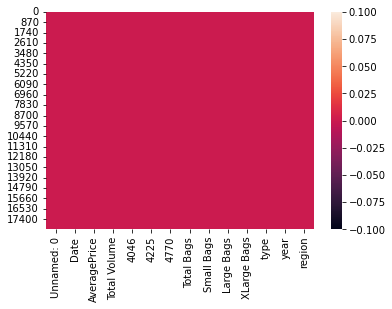

In [8]:
sns.heatmap(df.isnull())

In [9]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
df['Date']=enc.fit_transform(df['Date'].values.reshape(-1,1))
df['type']=enc.fit_transform(df['type'].values.reshape(-1,1))
df['region']=enc.fit_transform(df['region'].values.reshape(-1,1))
df['year']=enc.fit_transform(df['year'].values.reshape(-1,1))

In [10]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,51.0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,0.0,0.0
1,1,50.0,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,0.0,0.0
2,2,49.0,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,0.0,0.0
3,3,48.0,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,0.0,0.0
4,4,47.0,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,161.0,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1.0,3.0,53.0
18245,8,160.0,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1.0,3.0,53.0
18246,9,159.0,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1.0,3.0,53.0
18247,10,158.0,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1.0,3.0,53.0


In [11]:
df.describe()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,18249.000000,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,24.232232,83.997096,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,0.499918,1.147899,26.495644
std,15.481045,48.787638,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,0.939938,15.583788
min,0.000000,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,10.000000,42.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,0.000000,0.000000,13.000000
50%,24.000000,84.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,0.000000,1.000000,26.000000
75%,38.000000,126.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,1.000000,2.000000,40.000000
max,52.000000,168.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000,3.000000,53.000000


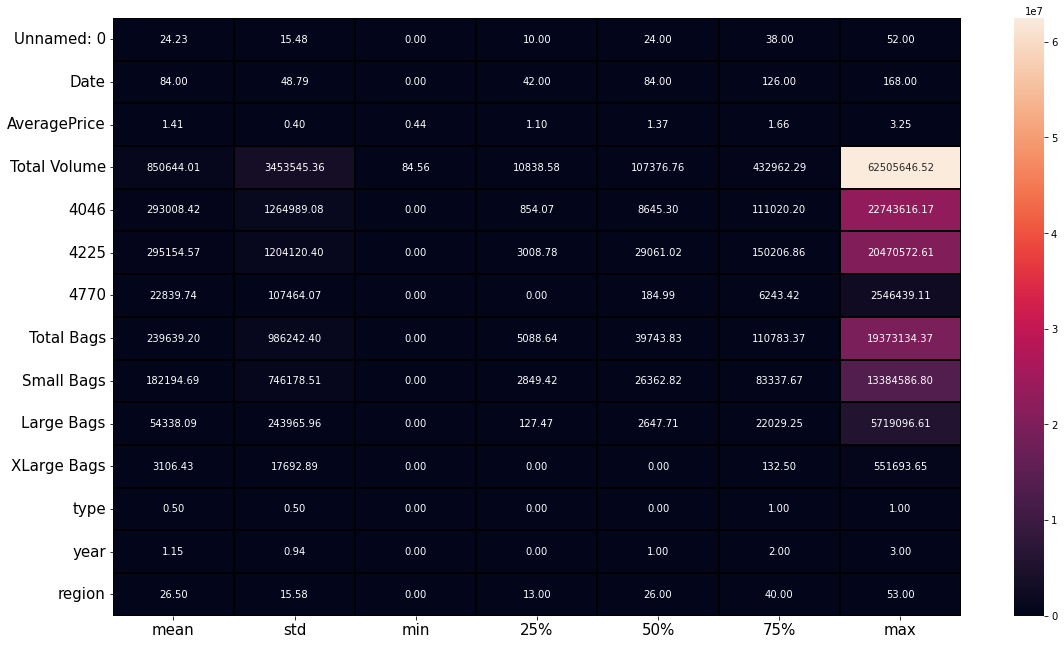

In [12]:
plt.figure(figsize=(19,11))
sns.heatmap(round(df.describe()[1:].transpose(),2),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [13]:
df.corr()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Unnamed: 0,1.000000,-0.419926,-0.133008,0.014035,0.017628,0.019829,0.041752,-0.002219,0.000347,-0.009196,-0.011546,-0.000288,-0.171667,-0.000489
Date,-0.419926,1.000000,0.145514,0.009263,-0.005028,-0.016895,-0.047517,0.064688,0.056902,0.081855,0.077374,-0.000060,0.950274,-0.000101
AveragePrice,-0.133008,0.145514,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,0.093197,-0.011716
Total Volume,0.014035,0.009263,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.017193,0.174176
4046,0.017628,-0.005028,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.003353,0.192073
4225,0.019829,-0.016895,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,-0.009559,0.145726
4770,0.041752,-0.047517,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,-0.036531,0.095252
Total Bags,-0.002219,0.064688,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.071552,0.175256
Small Bags,0.000347,0.056902,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.063915,0.164702
Large Bags,-0.009196,0.081855,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.087891,0.198768


<AxesSubplot:>

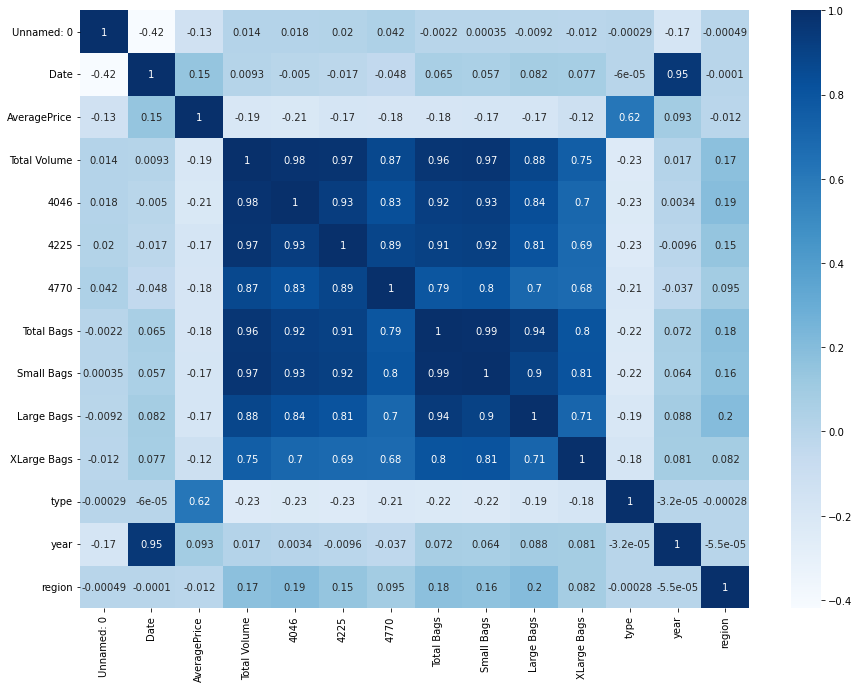

In [14]:
plt.figure(figsize=(15,11))
sns.heatmap(df.corr(),cmap='Blues',annot=True)

In [15]:
df.corr()['region'].sort_values()

AveragePrice   -0.011716
Unnamed: 0     -0.000489
type           -0.000280
Date           -0.000101
year           -0.000055
XLarge Bags     0.082281
4770            0.095252
4225            0.145726
Small Bags      0.164702
Total Volume    0.174176
Total Bags      0.175256
4046            0.192073
Large Bags      0.198768
region          1.000000
Name: region, dtype: float64

In [16]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,51.0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,0.0,0.0
1,50.0,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,0.0,0.0
2,49.0,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,0.0,0.0
3,48.0,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,0.0,0.0
4,47.0,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,0.0,0.0


In [17]:
df.type=df['type'].astype(int)
df['year']=df['year'].astype(int)
df['region']=df['region'].astype(int)
df['Date']=df['Date'].astype(int)

In [18]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,51,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0,0
1,50,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0,0
2,49,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0,0
3,48,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0,0
4,47,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0,0


# Relation Between AveragePrice, Total Volume and PLU Volumns

<AxesSubplot:xlabel='4046', ylabel='Total Volume'>

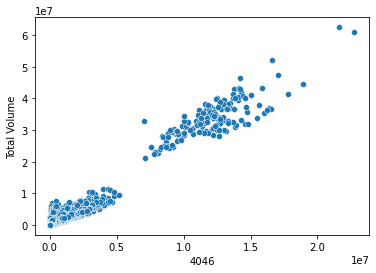

In [19]:
sns.scatterplot(data=df,x='4046',y='Total Volume')

<AxesSubplot:xlabel='4225', ylabel='Total Volume'>

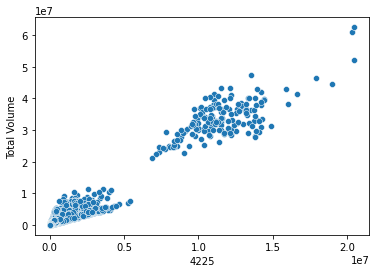

In [20]:
sns.scatterplot(data=df,x='4225',y='Total Volume')

<AxesSubplot:xlabel='4770', ylabel='Total Volume'>

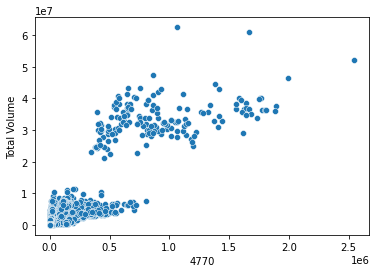

In [21]:
sns.scatterplot(data=df,x='4770',y='Total Volume')

<AxesSubplot:xlabel='Total Volume', ylabel='AveragePrice'>

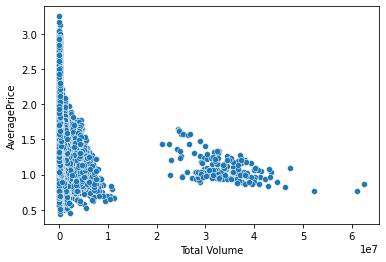

In [22]:
sns.scatterplot(data=df,y='AveragePrice',x='Total Volume')

# Relation Between AveragePrice, Total Bags and Size Bags

<AxesSubplot:xlabel='Small Bags', ylabel='Total Bags'>

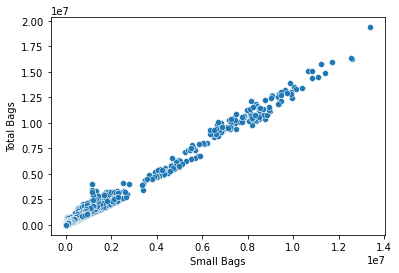

In [23]:
sns.scatterplot(data=df,x='Small Bags',y='Total Bags')

<AxesSubplot:xlabel='Large Bags', ylabel='Total Bags'>

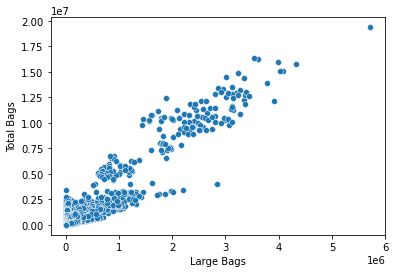

In [24]:
sns.scatterplot(data=df,x='Large Bags',y='Total Bags')

<AxesSubplot:xlabel='XLarge Bags', ylabel='Total Bags'>

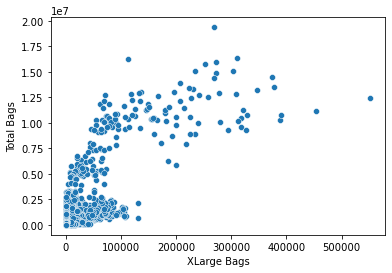

In [25]:
sns.scatterplot(data=df,x='XLarge Bags',y='Total Bags')

<AxesSubplot:xlabel='Total Bags', ylabel='AveragePrice'>

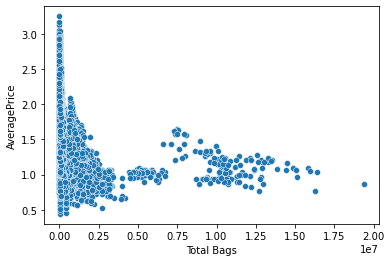

In [26]:
sns.scatterplot(data=df,x='Total Bags',y='AveragePrice')

In [27]:
df['region'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53])

# Outliers

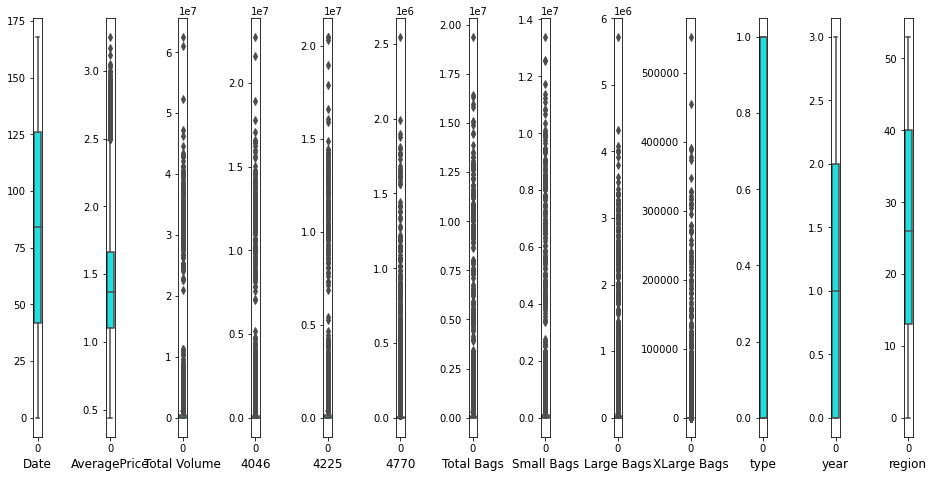

In [28]:
collist=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data=df[collist[i]],color='cyan',orient='v')
    plt.xlabel(collist[i],fontsize=12)
    plt.tight_layout()

In [29]:
z=np.abs(zscore(df.iloc[:,:]))
z.shape

(18249, 13)

In [30]:
threshold=3
np.where(z>3)

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64),
 array([3, 3, 9, ..., 1, 1, 1], dtype=int64))

In [31]:
len(np.where(z>3)[0])

1773

In [32]:
df_new=df[(z<3).all(axis=1)]

# Key Points:
- In the case study we can understand that Total Volume=Column(4046)+Column(4225)+Column(4770), total volumn will be dropped since 4046,4225,4770 are products of avocado we cant drop them therefore drop Total Volume
- From the dataset we can understand that Total Bags is also the same as the point as above, hence dropping Total bags

# 1.Target As Region (Classifier)

In [33]:
x=df_new.drop(['Total Bags','Total Volume','region'],axis=1)
y=df_new['region']
x.head()

,Date,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year
0,51,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,0,0
1,50,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,0,0
2,49,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0,0,0
3,48,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0,0,0
4,47,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0,0,0


# Scaling

In [34]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
x=scale.fit_transform(x)
x=pd.DataFrame(x)
x.columns=['Date','AveragePrice','4046','4225','4770','Small Bags','Large Bags','XLarge Bags','type','year']
x

,Date,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year
0,0.303571,0.410138,0.000254,0.013981,0.000140,0.003663,0.000119,0.0,0.0,0.0
1,0.297619,0.419355,0.000165,0.011461,0.000169,0.004005,0.000125,0.0,0.0,0.0
2,0.291667,0.225806,0.000195,0.028024,0.000379,0.003424,0.000132,0.0,0.0,0.0
3,0.285714,0.294931,0.000277,0.018480,0.000211,0.002417,0.000171,0.0,0.0,0.0
4,0.279762,0.387097,0.000230,0.011256,0.000220,0.002549,0.000253,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
17646,0.958333,0.548387,0.000501,0.000393,0.000000,0.005563,0.000553,0.0,1.0,1.0
17647,0.952381,0.585253,0.000292,0.000881,0.000000,0.003806,0.000416,0.0,1.0,1.0
17648,0.946429,0.658986,0.000292,0.000630,0.002113,0.003981,0.000054,0.0,1.0,1.0
17649,0.940476,0.686636,0.000374,0.000765,0.002110,0.004649,0.000064,0.0,1.0,1.0


# Checking Skewness

In [35]:
x.skew()

Date            0.013714
AveragePrice    0.377432
4046            4.909848
4225            4.455745
4770            5.117170
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
year            0.229976
dtype: float64

<AxesSubplot:xlabel='4046', ylabel='Density'>

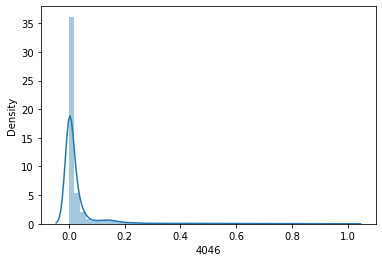

In [36]:
sns.distplot(x['4046'])

<AxesSubplot:xlabel='4225', ylabel='Density'>

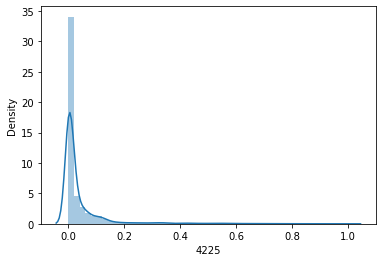

In [37]:
sns.distplot(x['4225'])

<AxesSubplot:xlabel='4770', ylabel='Density'>

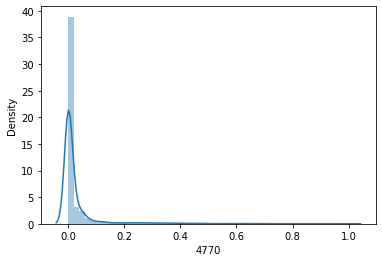

In [38]:
sns.distplot(x['4770'])

<AxesSubplot:xlabel='Small Bags', ylabel='Density'>

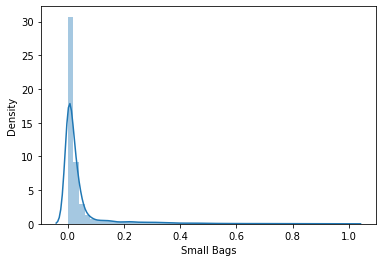

In [39]:
sns.distplot(x['Small Bags'])

<AxesSubplot:xlabel='Large Bags', ylabel='Density'>

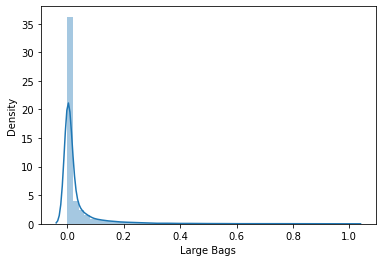

In [40]:
sns.distplot(x['Large Bags'])

<AxesSubplot:xlabel='XLarge Bags', ylabel='Density'>

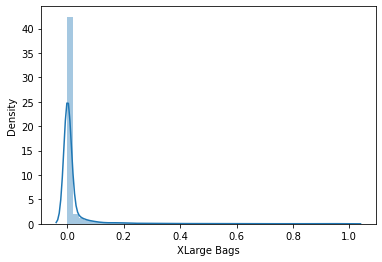

In [41]:
sns.distplot(x['XLarge Bags'])

In [42]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x)
x=pd.DataFrame(x_new,columns=x.columns)

In [43]:
x.skew()

Date           -0.056306
AveragePrice    0.006061
4046            1.208492
4225            1.007566
4770            1.383005
Small Bags      0.933017
Large Bags      1.124755
XLarge Bags     1.849250
type           -0.037741
year           -0.012231
dtype: float64

# Selecting Model

In [44]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
maxAcc=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=i)
    dt.fit(x_train,y_train)
    preddt=dt.predict(x_test)
    acc=accuracy_score(y_test,preddt)
    if(acc>maxAcc):
        maxAcc=acc
        maxRS=i
print("Best accuracy: ",maxAcc*100," on Random State: ",maxRS)

print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Best accuracy:  81.78110129163834  on Random State:  89
[[62  0  0 ...  0  0  0]
 [ 0 59  0 ...  0  0  0]
 [ 0  0 59 ...  0  0  1]
 ...
 [ 0  0  0 ... 44  0  0]
 [ 0  0  0 ...  0 72  0]
 [ 0  2  1 ...  0  0 63]]
              precision    recall  f1-score   support

           0       0.83      0.77      0.79        81
           1       0.78      0.73      0.75        81
           2       0.89      0.95      0.92        62
           3       0.74      0.78      0.76        78
           4       0.86      0.84      0.85        92
           5       0.76      0.83      0.79        72
           6       0.92      0.94      0.93        72
           7       0.84      0.83      0.84        71
           8       0.89      0.91      0.90        94
           9       0.82      0.80      0.81        82
          10       0.75      0.72      0.74        87
          11       0.89      0.86      0.88        88
          12       0.86      0.91      0.88        96
          13       0.74      0.

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
maxAcc=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=i)
    rf.fit(x_train,y_train)
    predrf=rf.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if(acc>maxAcc):
        maxAcc=acc
        maxRS=i
print("Best accuracy: ",maxAcc*100," on Random State: ",maxRS)

print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Best accuracy:  93.02062089281668  on Random State:  97
[[74  0  0 ...  0  0  0]
 [ 0 70  0 ...  0  0  0]
 [ 0  0 61 ...  0  0  0]
 ...
 [ 0  0  0 ... 44  0  0]
 [ 0  0  0 ...  0 78  0]
 [ 0  1  1 ...  0  0 74]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.92        81
           1       0.85      0.86      0.86        81
           2       0.97      0.98      0.98        62
           3       0.92      0.87      0.89        78
           4       0.94      1.00      0.97        92
           5       0.93      0.92      0.92        72
           6       0.97      1.00      0.99        72
           7       0.95      0.97      0.96        71
           8       0.99      0.99      0.99        94
           9       0.94      0.91      0.93        82
          10       0.89      0.94      0.92        87
          11       0.96      0.98      0.97        88
          12       0.96      0.96      0.96        96
          13       0.85      0.

In [46]:
from sklearn.neighbors import KNeighborsClassifier

kn=KNeighborsClassifier()
maxAcc=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=i)
    kn.fit(x_train,y_train)
    predkn=kn.predict(x_test)
    acc=accuracy_score(y_test,predkn)
    if(acc>maxAcc):
        maxAcc=acc
        maxRS=i
print("Best accuracy: ",maxAcc*100," on Random State: ",maxRS)

print(confusion_matrix(y_test,predkn))
print(classification_report(y_test,predkn))

Best accuracy:  70.08837525492862  on Random State:  33
[[61  0  0 ...  0  0  0]
 [ 2 49  0 ...  0  0  1]
 [ 0  0 54 ...  0  0  0]
 ...
 [ 0  0  0 ... 44  0  0]
 [ 0  0  0 ...  0 66  0]
 [ 2  1  0 ...  0  0 54]]
              precision    recall  f1-score   support

           0       0.44      0.75      0.55        81
           1       0.45      0.60      0.52        81
           2       0.65      0.87      0.74        62
           3       0.46      0.71      0.56        78
           4       0.68      0.67      0.68        92
           5       0.53      0.68      0.59        72
           6       0.84      0.81      0.82        72
           7       0.65      0.77      0.71        71
           8       0.89      0.94      0.91        94
           9       0.59      0.62      0.61        82
          10       0.35      0.40      0.37        87
          11       0.72      0.80      0.76        88
          12       0.75      0.74      0.74        96
          13       0.54      0.

In [ ]:
from sklearn.svm import SVC
sv=SVC()
maxAcc=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=i)
    sv.fit(x_train,y_train)
    predsv=sv.predict(x_test)
    acc=accuracy_score(y_test,predsv)
    if(acc>maxAcc):
        maxAcc=acc
        maxRS=i
print("Best accuracy: ",maxAcc*100," on Random State: ",maxRS)

print(confusion_matrix(y_test,predsv))
print(classification_report(y_test,predsv))

# AUC-ROC Curve

In [49]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rf,x_test,y_test)
plt.title('ROC AUC plot')
plt.show()

ValueError: Expected 'estimator' to be a binary classifier, but got RandomForestClassifier fit on multiclass (54 classes) data

# Saving Model

In [72]:
import joblib
joblib.dump(rf,'Avacado Classifier Model.pkl')

['Avacado Classifier Model.pkl']